In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

#added
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("Spotify_tracks.csv")


In [3]:
tracks_df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
tracks_df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# Select only necessary features for clustering

tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

from scipy.stats import zscore
tracks = tracks.apply(zscore)
tracks_df.update(tracks)

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\clust

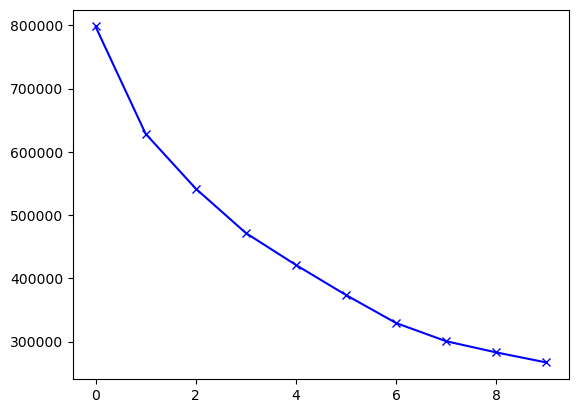

In [8]:
elbow = []
for i in range(1, 11):
    temp = KMeans(n_clusters = i)
    temp.fit(tracks)
    elbow.append(temp.inertia_)
plt.plot(elbow, 'bx-')
plt.show()

In [9]:
# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
kmeans = KMeans(n_clusters=6)

In [10]:
# Train the model with our data
kmeans.fit(tracks)

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [11]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [12]:
#testi
#data = "Spotify_tracks.csv"
#kmeans.fit(data)
#tracks_df["type"] = kmeans.labels_

In [13]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.


tracks_df["type"] = kmeans.labels_
#TODO

In [14]:

tracks_df["type"]
#TODO

0         3
1         2
2         2
3         2
4         2
         ..
113995    4
113996    4
113997    2
113998    2
113999    2
Name: type, Length: 114000, dtype: int32

In [15]:
tracks_df.shape


(114000, 22)

In [16]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [17]:
tracks.head(13)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.629244,-0.717148,...,0,0.551848,-0.850202,-0.504109,0.758743,0.929306,87.917,4,acoustic,3
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,-0.845908,-1.889980,...,1,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,-0.742186,-1.122669,...,1,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,-1.733304,-2.312994,...,1,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.295030,-0.788711,...,1,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,119.949,4,acoustic,2
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.698392,-0.637634,...,1,0.192448,-0.077920,-0.504112,-0.128970,0.740306,98.017,4,acoustic,3
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,-0.920818,-1.965518,...,1,-0.464875,1.630242,-0.504103,-0.642162,-1.533474,141.284,3,acoustic,2
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.784827,-0.784735,...,1,-0.406236,0.734058,-0.504112,-0.610646,0.917734,150.960,4,acoustic,3
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.335366,-0.904006,...,1,-0.451634,-0.062883,-0.504112,-0.328574,0.751878,130.088,4,acoustic,3
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,-0.719137,-0.037303,...,1,-0.521622,0.334084,-0.490576,-0.735661,-1.072546,78.899,4,acoustic,2


In [18]:
# Prompt the user to enter their favorite songs' ids

ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')


Enter comma-separated ids of your favorite songs
>  13, 14, 15, 16, 17


In [19]:
#Trim whitespace from each ID and convert to integers
ids = [int(id.strip()) for id in ids]

# Print the entered IDs from the 'UID' column (for debugging purposes)
print("Entered IDs:", ids)

Entered IDs: [13, 14, 15, 16, 17]


In [20]:
# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['Unnamed: 0'].isin(ids)]

In [21]:
favorites

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
13,13,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62,248448,False,0.715679,-1.619632,...,1,-0.531080,1.389655,-0.504112,-0.491409,-1.022403,87.103,4,acoustic,2
14,14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,1.084467,0.551101,...,1,-0.491357,-0.574129,-0.504020,-0.486156,-0.335834,120.004,4,acoustic,3
15,15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,-0.448308,-0.319578,...,1,-0.541484,-0.345572,-0.503965,-0.181497,-0.910547,83.457,3,acoustic,5
16,16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.802114,-2.104668,...,1,-0.430827,1.540022,-0.504099,-0.465145,-0.231691,110.154,4,acoustic,2
17,17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,False,1.314960,-2.215590,...,0,-0.364621,1.284399,-0.504074,-0.673679,0.520450,91.803,4,acoustic,2


In [22]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')


Favorite cluster: 2 



In [23]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,-0.845908,-1.889980,...,1,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,-0.742186,-1.122669,...,1,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,-1.733304,-2.312994,...,1,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.295030,-0.788711,...,1,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,119.949,4,acoustic,2
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,-0.920818,-1.965518,...,1,-0.464875,1.630242,-0.504103,-0.642162,-1.533474,141.284,3,acoustic,2


## Data Exploration

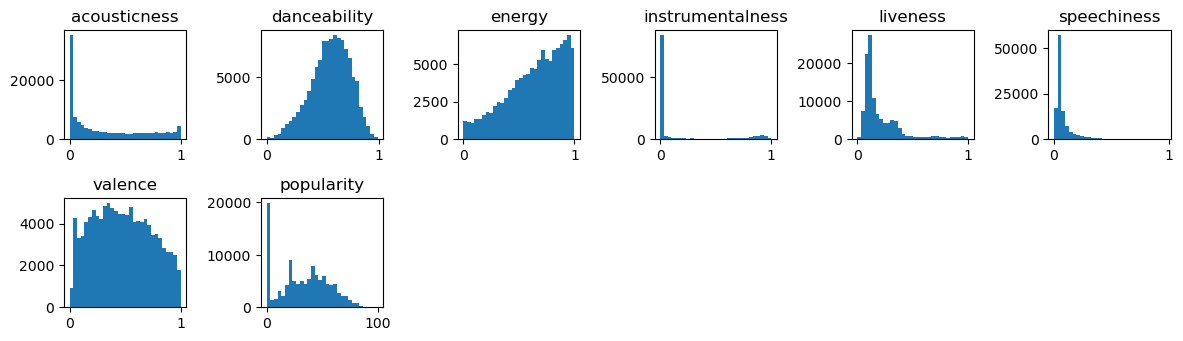

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.171533 -0.733906          0.104027   
danceability         -0.171533      1.000000  0.134325         -0.185606   
energy               -0.733906      0.134325  1.000000         -0.181879   
instrumentalness      0.104027     -0.185606 -0.181879          1.000000   
liveness             -0.020700     -0.131617  0.184796         -0.079893   
speechiness          -0.002186      0.108626  0.142509         -0.089616   
valence              -0.107070      0.477341  0.258934         -0.324312   
popularity           -0.025472      0.035448  0.001056         -0.095139   

                  liveness  speechiness   valence  popularity  
acousticness     -0.020700    -0.002186 -0.107070   -0.025472  
danceability     -0.131617     0.108626  0.477341    0.035448  
energy            0.184796     0.142509  0.258934    0.001056  
instrumentalness -0.079893    -0.089616 -0.324312   -0.0951

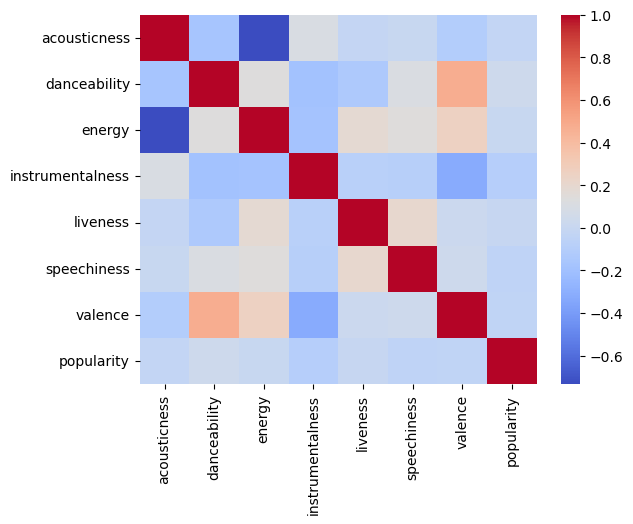

In [25]:
data = pd.read_csv("Spotify_tracks.csv")
data = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","popularity"]]


# PLOTTING HISTOGRAMS FOR ALL VARIABLES
# <Your code here>
fig = plt.figure(figsize=(12,10))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(6,6,i + 1)
    #ax = axs[int(i/6), int(i%6)]
    ax.hist(data[col], bins=30)
    ax.set_title(col)

    
fig.tight_layout()
plt.show()


# CALCULATE THE CORRELATION MATRIX
# <Your code here>
correlation = data.corr()
print(correlation)

# Decrease font size
#plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
# <Your code here>

#plt.figure(figsize=(8,7))
heatmap = sns.heatmap(correlation, cmap="coolwarm")
plt.show()




In [26]:


# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
# <Your code here>
X = data
y = data['popularity']


# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
# <Your code here>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
# <Your code here>
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
# <Your code here>
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

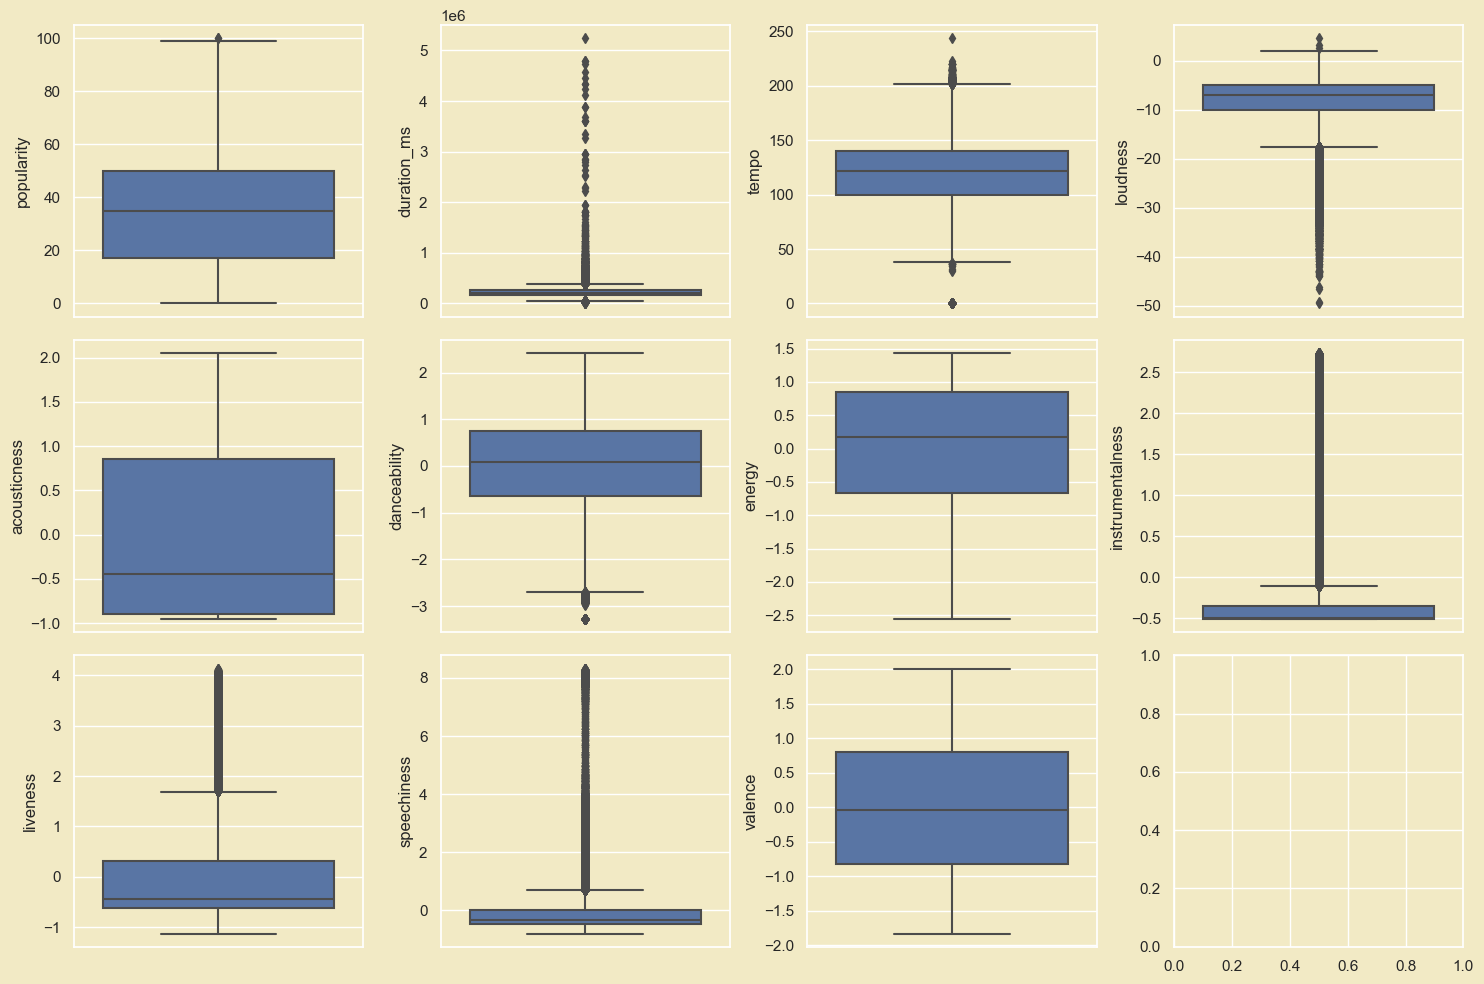

In [28]:
# boxplot for numerical columns
print(tracks)
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=tracks_df, ax=axes[i//4, i%4])
    #axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

Valence, acousticness, and energy doesn't have outliers. 